<a href="https://colab.research.google.com/github/DharmeshRV/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Problem Statement**


**Seoul Bike has become the capital city's popular public transport system. The public bicycle rental system is favored by Seoulites who wish to travel short distances of a few kilometers instead of using crowded buses or subway trains.**

**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bikes available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **GitHub Link -**

https://github.com/DharmeshRV/Bike-Sharing-Demand-Prediction

# ***Let's Begin !***

## ***1. Knowing the Data***

### Import Libraries

In [1]:
# First we import the important  libraries 
import numpy as np
from numpy import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Now mount the drive to get the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Get the path of the data file
path='/content/drive/MyDrive/Colab Notebooks/Almabetter_Data Science/Capstone Projects/Bike Sharing Demand Prediction - Dharmesh Kumar/SeoulBikeData.csv'

In [4]:
# Now we create the dataframe 
bike_df=pd.read_csv(path,encoding = 'cp1252')

### Dataset First View

In [5]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Dataset Rows and Columns Count
bike_df.shape

(8760, 14)

### Dataset Information

In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Duplicate Values

In [8]:
# looking for duplicate entries. True shows duplicate row.
bike_df.duplicated().value_counts()

False    8760
dtype: int64

### Null Values

In [9]:
# getting column-wise null values
bike_df.isnull().sum().sort_values(ascending=False)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did we know about our dataset

The dataset has information of rented bikes on hourly basis for one year. We have to analyze the rented bike count per hour and various factors affecting the rentals. The dataset has 8760 rows & 14 columns with no duplicate and null values.

## ***2. Understanding The Variables***

In [10]:
# columns in the dataframe
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# showing some statistical measures 
bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Checking unique values in each column

In [12]:
# Check Unique Values for each variable.
for i in bike_df.columns.tolist():
  print("No. of unique values in ",i,"is",bike_df[i].nunique(),".")

No. of unique values in  Date is 365 .
No. of unique values in  Rented Bike Count is 2166 .
No. of unique values in  Hour is 24 .
No. of unique values in  Temperature(°C) is 546 .
No. of unique values in  Humidity(%) is 90 .
No. of unique values in  Wind speed (m/s) is 65 .
No. of unique values in  Visibility (10m) is 1789 .
No. of unique values in  Dew point temperature(°C) is 556 .
No. of unique values in  Solar Radiation (MJ/m2) is 345 .
No. of unique values in  Rainfall(mm) is 61 .
No. of unique values in  Snowfall (cm) is 51 .
No. of unique values in  Seasons is 4 .
No. of unique values in  Holiday is 2 .
No. of unique values in  Functioning Day is 2 .


In [13]:
# Unique values in 'Seasons','Holiday', 'Functioning Day' columns
j=['Seasons','Holiday', 'Functioning Day']
for i in j:
  print("Unique values in ",i,"are",bike_df[i].unique(),".")

Unique values in  Seasons are ['Winter' 'Spring' 'Summer' 'Autumn'] .
Unique values in  Holiday are ['No Holiday' 'Holiday'] .
Unique values in  Functioning Day are ['Yes' 'No'] .


### <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : day-month-year
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No Holiday
* ### Functional Day - No(Non Functional Hours), Yes(Functional hours)

## 3. ***Data Wrangling***

First of all we rename the columns to understandable names that are easy to use.

In [14]:
# Code to rename the columns
bike_df.rename(columns = {'Date':'date','Rented Bike Count':'rented_count', 'Hour':'hour','Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                          'Wind speed (m/s)':'wind_speed','Visibility (10m)':'visibility','Dew point temperature(°C)':'dew_point_temp',
                          'Solar Radiation (MJ/m2)':'solar_radiation','Rainfall(mm)':'rainfall','Snowfall (cm)':'snowfall','Seasons':'seasons',
                          'Holiday':'holiday','Functioning Day':'funct_day'},inplace=True)

We have 'date' column with object data type so first we change it to datetime datatype. Further we create a column for days using the 'date' column because days of the week may exhibit some kind of renting pattern.



The dataset has a 'season' column with 4 seasons of the year so we are not considering to analyze the month-wise renting.

In [15]:
# Changing the datatype of date column
bike_df['date']=pd.to_datetime(bike_df['date'], format = "%d/%m/%Y")
# Creating a column for days
bike_df['days'] = bike_df['date'].dt.day_name()

In [16]:
# count of average rentals for each hour
bike_df.groupby('hour')['rented_count'].mean()

hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: rented_count, dtype: float64

The 'hour' column in the dataset has 24 values from 0 to 23 hours so we considerd grouping them in some periods for better analysis and decided to divide the 24 hours in 3 periods of 8 hours each. The 3 periods are defined as:
* 'night' : starts from mid-night at 0 hours and lasts till 7 hours in the morning.
* 'day' : starts in the morning at 8 hours and lasts till 15 hours in the after-noon.
* 'evening' : starts in the after-noon at 16 hours and lasts till 23 hours in the night.


In [17]:
# Forming the 'period' column with periods defined above.
bike_df['period']= bike_df['hour'].apply(lambda x: 'night' if x<8 else ( 'day' if x<16 else'evening'))

In [18]:
# Make a copy of dataframe
df=bike_df.copy()

In [19]:
# Now we drop the date column
df.drop(columns=['date'], inplace=True)

In [20]:
df.head()

,rented_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,funct_day,days,period
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,night
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,night
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,night
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,night
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,night


### What all manipulations are done and insights we found?

All the manipulations are done to get a workable and analysis-friendly dataset. First we renamed the columns to sensible names.

The 'date' column in the dataset we are provided with was of object type so to make it usable we changed it to 'datetime' format. The analysis of day-wise renting would make more sense so we got a column for days from date column. We'll see various relationships in the next section.


In order to get some insight from various day-segments we divide the 24 hours of day in 3 parts of 8 hours. It will make us aware of some renting pattern in the next section.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Distribution Chart on Dependant Variable i.e., Rented Bike Count  (Univariate)

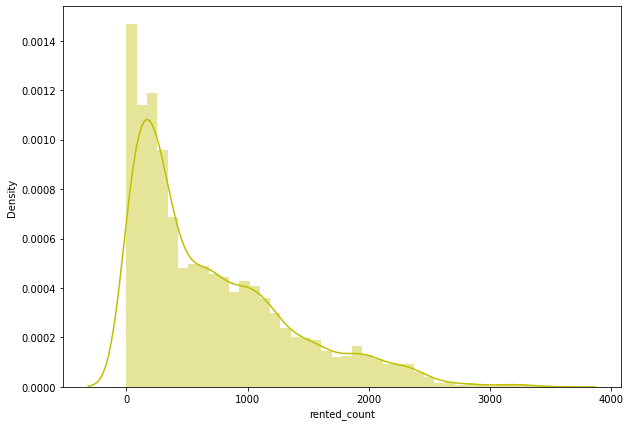

In [21]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(10,7))
sns.distplot(df['rented_count'],color="y")

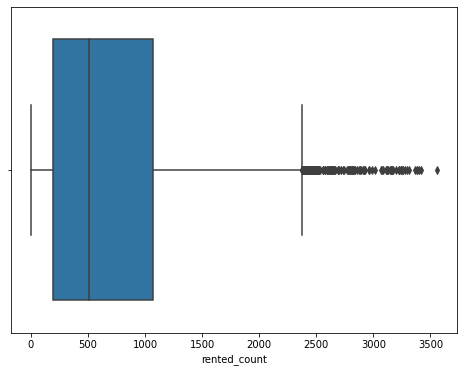

In [22]:
# Boxplot for rented_count column to show outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df['rented_count'])


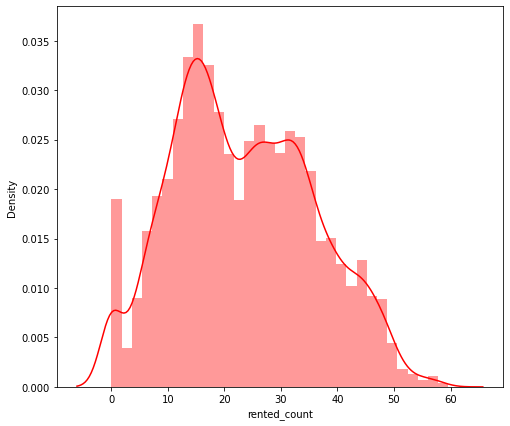

In [23]:
# the Rented Bike Count data is skewed towards the right so we apply the squre root transformation
plt.figure(figsize=(8,7))
sns.distplot(np.sqrt(df['rented_count']),color='r')

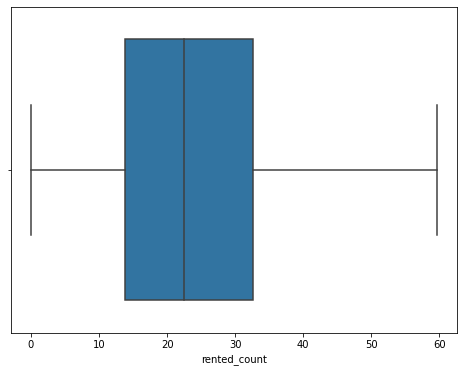

In [24]:
# Boxplot for rented_count column to show outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=np.sqrt(df['rented_count']))


##### 1. Why did we pick the specific chart?

The distribution chart expresses the pattern according to which the values are distributed. We generally use a histogram  or distribution plot to understand the pattern. 

 Anothor way to graphically demonstrate the locality, spread and skewness of numerical data is the box plot.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most of the values are concentrated in the left. The rented count values that are more than 1000 or so have less frequency and the distribution is positively skewed.

##### 3. Will the gained insights help creating a positive business impact? 

The distribution of rental bike count on hourly basis gives the idia of the most likely and the most unlikely rental count so that the management can arrange the bikes accordingly.

#### Chart - 2 - distributon of Numeric features (Univariate)

In [25]:
# first we get the numeric features listed
numeric_features=df.describe().columns
numeric_features

Index(['rented_count', 'hour', 'temp', 'humidity', 'wind_speed', 'visibility',
       'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall'],
      dtype='object')

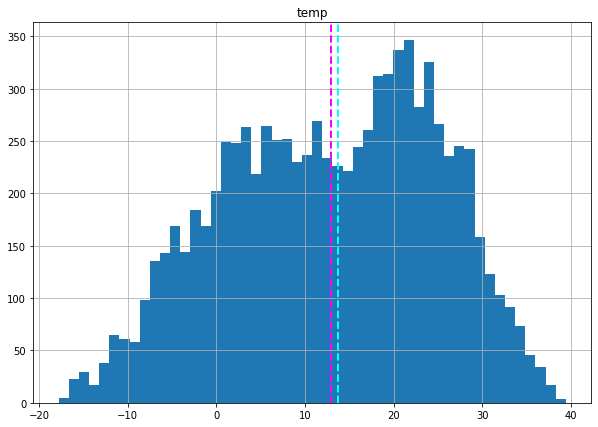

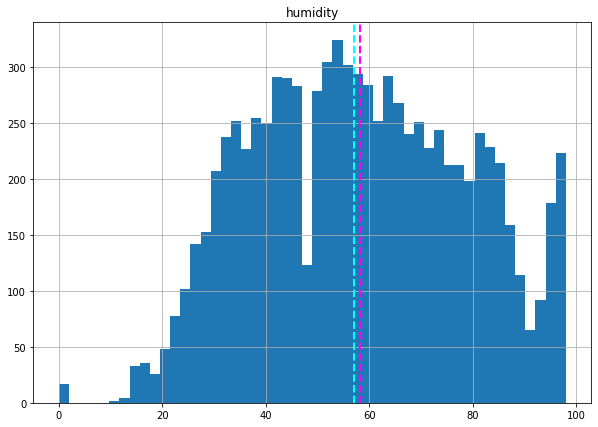

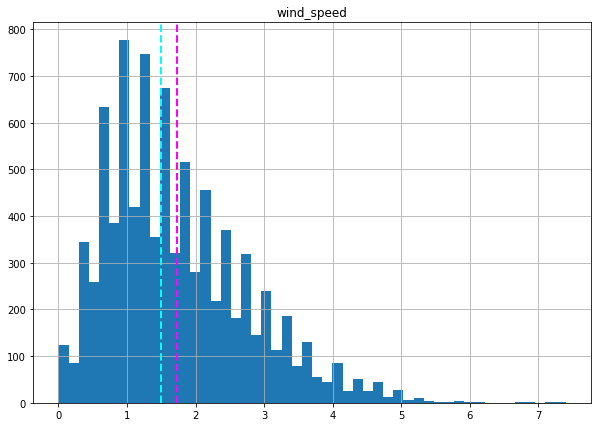

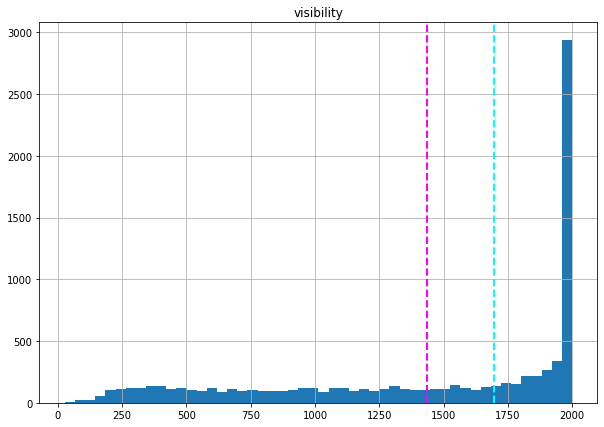

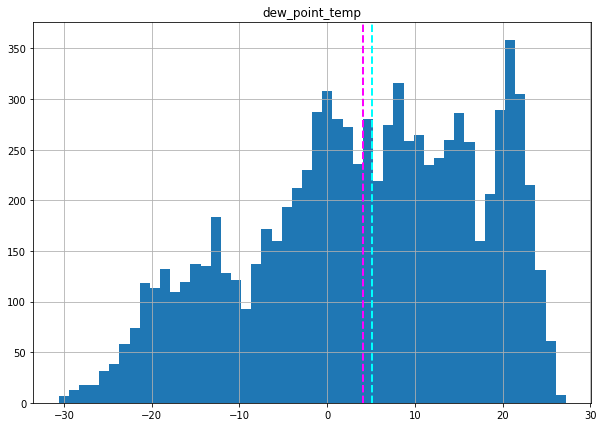

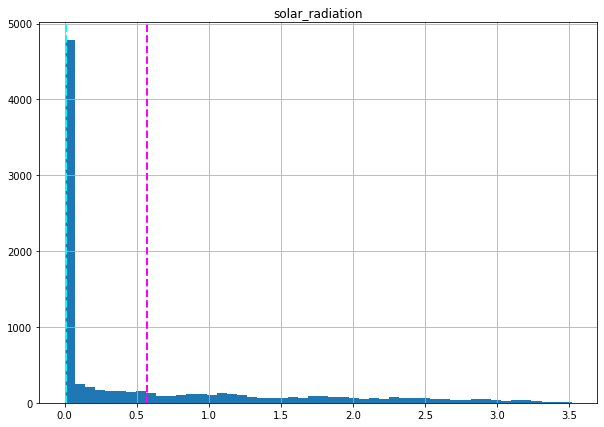

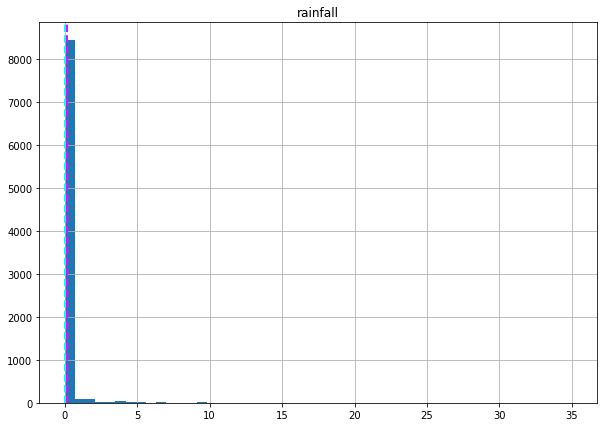

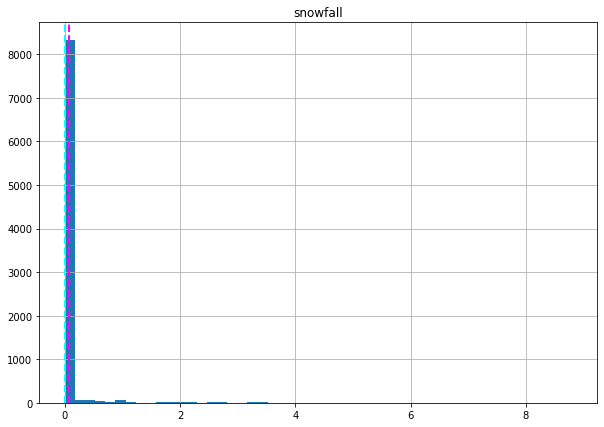

In [26]:
  # We plot hoistograms for eache numerical feature to see the distribution of the data.
for i in numeric_features[2:]:
    fig=plt.figure(figsize=(10,7))
    ax=fig.gca()
    feature= df[i]
    feature.hist(bins=50,ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(i)
plt.show()


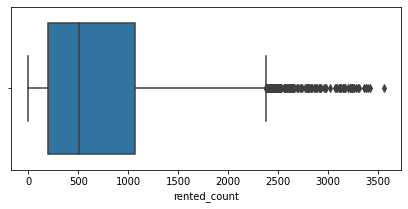

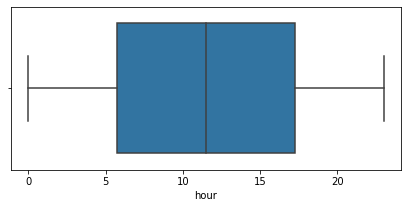

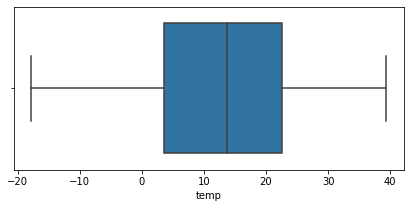

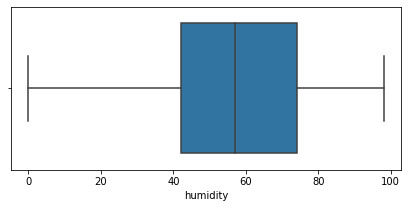

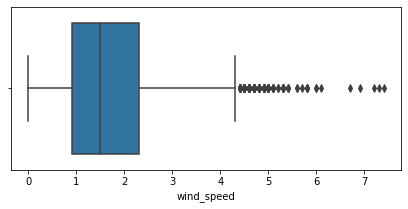

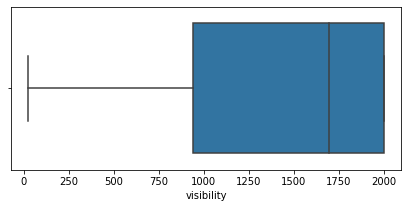

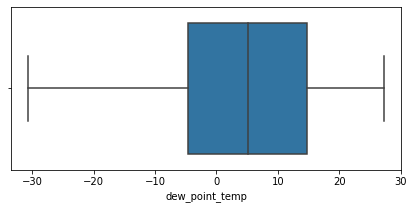

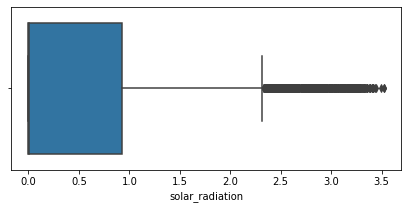

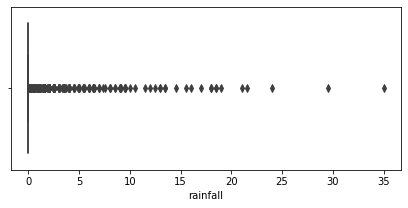

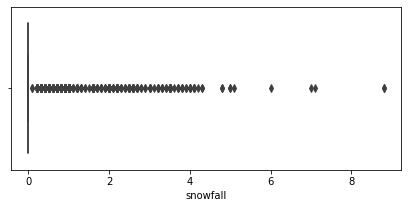

In [27]:
# box plot for each columns to know the data distibution
for col in numeric_features:
    plt.figure(figsize=(7, 3))
    sns.boxplot(x=df[col])
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram helps in understanding the distribution of data. We can also make a guess of mean values.
In order to get the distribution of numeric data we are using the histogram which clearly expresses the frequencies, indicates  mean values.

box plot is used to analyse the outliers and interquartile range including median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

The temperature data can be considered normally distributed with mean 12.88°C. All the values lie between -18°C to 40°C.

The distribution of humidity data is not very far from normality. Average humidity is 58.2 %. All the values are between 0 and 100.

The chart shows that the wind speed data is positively skewed with values greater than 4 m/s having very small frequencies. 1.72 m/s is the mean speed and 0.0 and 7.4 m/s are the min. & max. values respectively.

The visibility data is not normal. 1436.8 deca m is the mean value. More than 25% entries have value 2000 which is the ehighest value as well. Other smaller values are somewhat uniformally distributed.

Dew point temperature data is left-skewed and values range from -30.6 to 27.2 °C. The average value is 4.07°C.

The solar radiation data is highly skewed towards the right with mean at ~0.56 MJ/m2. Approximately 50% values are less than 0.01 MJ/m2 and the highest value is ~3.5 MJ/m2

Since this is hourly rainfall, the chart shows that approximately all the values are concentrated at 0.0 mm and the highest value is 35 mm with mean at ~0.15 mm.

The chart shows that most of the hourly snowfall values are 0.0 cm.

#### Chart - 3 - Bar plot for rental counts vs hours

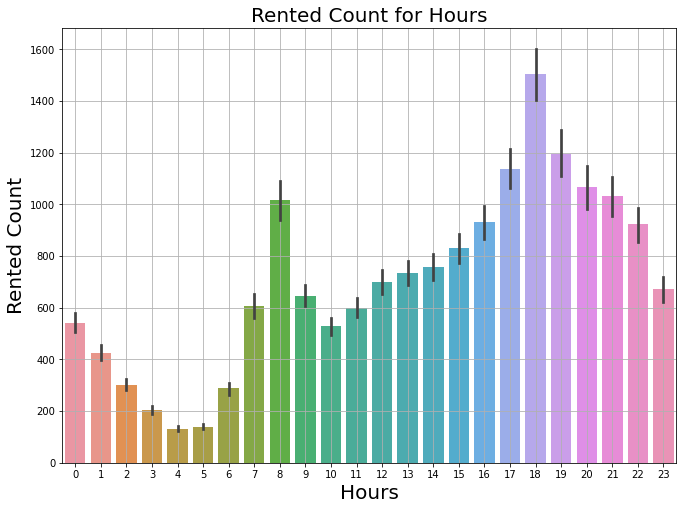

In [28]:
# bar chart for hourly average rentals.
plt.figure(figsize=(11,8))
sns.barplot(data=df,x='hour',y='rented_count')
plt.title('Rented Count for Hours',fontsize=20)
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Rented Count',fontsize=20)
plt.grid(True)

##### 1. Why did you pick the specific chart?

Bar chart represents categorical data by rectangular bars as categories with hights proportional to the values they represent. It helps in detecting the trends over different categories.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the renting decreases from 0 hours in the mid night upto 4 hours in the early morning which has the minimum average rentaing of bikes and then it increases till 8 hours in the morning. After decreasing between 8 to 10 hours, renting starts increasing and increases till 18 hours in the evening which has the highest average renting in the day. After 18 hours the renting decreases gradually.

#### Chart - 4  - Bar plot for Season_wise Rentals

In [29]:
# code to get average rentals in each season.
df.groupby('seasons')['rented_count'].mean()

seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: rented_count, dtype: float64

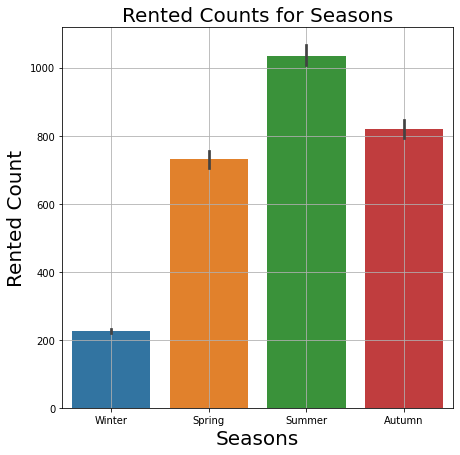

In [30]:
# Bar chart for season-wise rentals.
plt.figure(figsize=(7,7))
sns.barplot(data=df,x="seasons", y="rented_count")
plt.xlabel("Seasons",fontsize=20)
plt.title("Rented Counts for Seasons",fontsize=20)
plt.ylabel("Rented Count",fontsize=20)
plt.grid(True)

#####  What is/are the insight(s) found from the chart?

The bar chart shows average rented count in each season. Winter has the least rentals and summer has the most. In winter  there may be snowfall and people prefer a bus or a taxi to a bike so summer and autumn attract more rentals.

#### Chart - 5  - Bar plot for holiday vs rented count

In [31]:
# getting the number of holidays in the dataset.
df['holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64

There are 432 (hours) entries for holidays in the dataset.

In [32]:
# Counting aaverage rentals for holiday and no-holiday.
df.groupby('holiday')['rented_count'].mean()

holiday
Holiday       499.756944
No Holiday    715.228026
Name: rented_count, dtype: float64

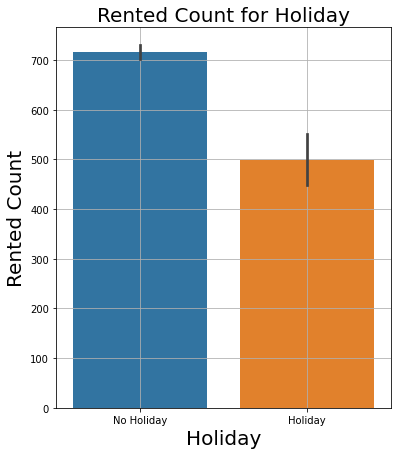

In [33]:
# Bar plot for average rentals against holiday.
plt.figure(figsize=(6,7))
sns.barplot(data=df,x='holiday',y='rented_count')
plt.title('Rented Count for Holiday',fontsize=20)
plt.xlabel('Holiday',fontsize=20)
plt.ylabel('Rented Count',fontsize=20)
plt.grid(True)

##### 1. Why did you pick the specific chart?

A bar chart shows trends over different categories representing the values with the hights of bars. Here bike rentals are plotted for holiday and no-holiday.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the two categories do not have the same rental counts. Non-holiday recorded more rentals than a holiday, it may be because on a holiday most of the people don't have to go anywhere.

#### Chart - 6  - Bar plot for average rentals for Functioning Day.

In [34]:
# Counting the functioning and non-functioning hours.
df['funct_day'].value_counts()

Yes    8465
No      295
Name: funct_day, dtype: int64

There are 295 entries for non-functional hours.

In [35]:
# Average renting on functioning and non-functioning hours
df.groupby('funct_day')['rented_count'].mean()

funct_day
No       0.000000
Yes    729.156999
Name: rented_count, dtype: float64

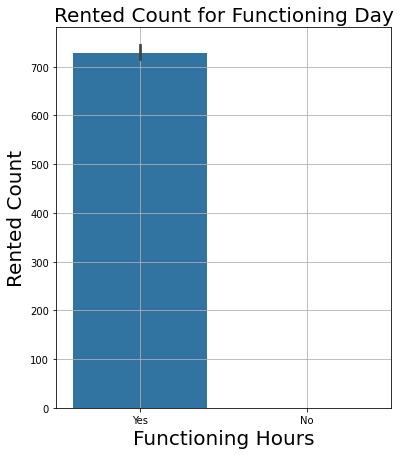

In [36]:
# Bar plot for mean rental vs functioning-day
plt.figure(figsize=(6,7))
sns.barplot(data=df,x='funct_day',y='rented_count')
plt.title('Rented Count for Functioning Day',fontsize=20)
plt.xlabel('Functioning Hours',fontsize=20)
plt.ylabel('Rented Count',fontsize=20)
plt.grid(True)

#####  What is/are the insight(s) found from the chart?

There is no renting of bike  in any non- funtional hour. So, for a non-functional day/hour renting is seemed to be closed.

#### Chart - 7 - Bar plot for rental counts vs period

In [37]:
# count of everage renting in different periods
df.groupby('period')['rented_count'].mean()

period
day         726.382192
evening    1057.692808
night       329.731164
Name: rented_count, dtype: float64

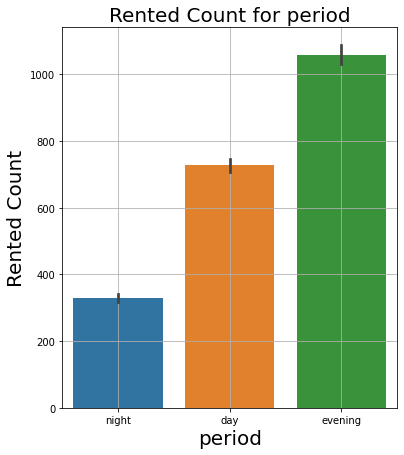

In [38]:
# bar chart for period-wise average rentals.
plt.figure(figsize=(6,7))
sns.barplot(data=df,x='period',y='rented_count')
plt.title('Rented Count for period',fontsize=20)
plt.xlabel('period',fontsize=20)
plt.ylabel('Rented Count',fontsize=20)
plt.grid(True)

#####  What is/are the insight(s) found from the chart?

In the night period the average renting count is the least and during the day there are moderate rentings. In the evenig everage renting is the highest.

#### Chart - 8 - Bar plot for day-wise rental counts

In [39]:
# count of everage renting on different days
df.groupby('days')['rented_count'].mean()

days
Friday       747.117925
Monday       730.563301
Saturday     709.528846
Sunday       625.155449
Thursday     690.704327
Tuesday      687.977564
Wednesday    740.349359
Name: rented_count, dtype: float64

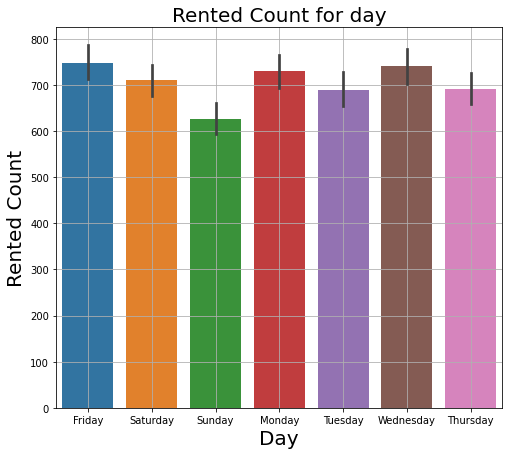

In [40]:
# bar chart for day-wise average rentals.
plt.figure(figsize=(8,7))
sns.barplot(data=df,x='days',y='rented_count')
plt.title('Rented Count for day',fontsize=20)
plt.xlabel('Day',fontsize=20)
plt.ylabel('Rented Count',fontsize=20)
plt.grid(True)


#####  What is/are the insight(s) found from the chart?

Sunday has the mimimum average renting with friday having the highest and there are no huge differeces among other days.

#### Chart - 9 - Scatter plot between Hour and rented count (Bivariate) 

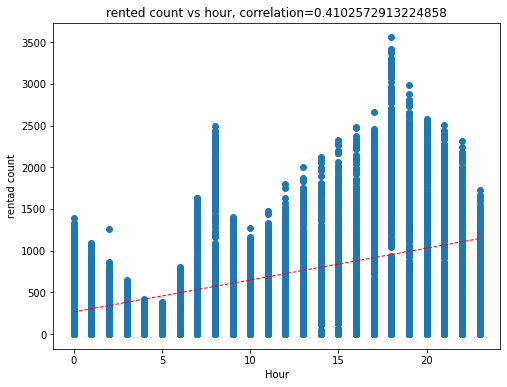

In [41]:
# scatter plot between hour and rented _count
fig= plt.figure(figsize=(8,6))
ax=fig.gca()
correlation=df['hour'].corr(df['rented_count'])
plt.scatter(x=df['hour'],y=df['rented_count'])
plt.xlabel('Hour')
plt.ylabel('rentad count')
ax.set_title('rented count vs hour, correlation='+str(correlation))
z=np.polyfit(df['hour'],df['rented_count'],1)
y_hat = np.poly1d(z)(df['hour'])
plt.plot(df['hour'], y_hat, "r--", lw=1)
plt.show()


##### 1. Why did you pick the specific chart?

 Scatter plot uses Cartesian coordinates to display values for two variables for a set of data. It shows the relationship between the dependent and independent variables plotted on the y and x axes respectively.

#####2. What is/are the insight(s) found from the chart?

The rented count shows increasing trend  with hours but the correlation is not that strong. The higher hour values have higher rented count but every hour have some small rented count so, roughly, higher hour value does not imply higher rented count.

#### Chart - 10 - temperature vs rented_count scatter plot

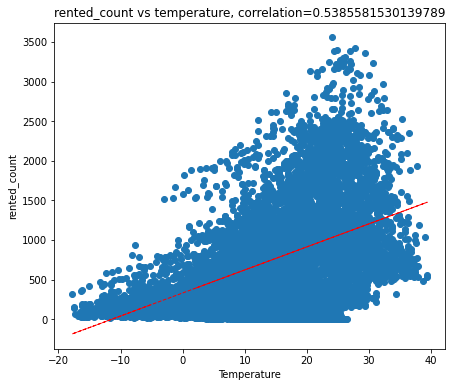

In [42]:
# Plotting temperature and rented_count on X-Y plane
fig = plt.figure(figsize=(7,6))
ax=fig.gca()
correlation = df['temp'].corr(df['rented_count'])
plt.scatter(x=df['temp'],y=df['rented_count'])
plt.xlabel('Temperature')
plt.ylabel('rented_count')
plt.title('rented_count vs temperature, correlation='+str(correlation))
z=np.polyfit(df['temp'],df['rented_count'],1)
y_hat=np.poly1d(z)(df['temp'])
plt.plot(df['temp'],y_hat,'r--',lw=1)
plt.show()

#####. What is/are the insight(s) found from the chart?

rented_count is positively correlated with temperature though the correlation coefficient is not very high.

#### Chart - 11 - Scatter plot between Humidity and rented count (Bivariate) 

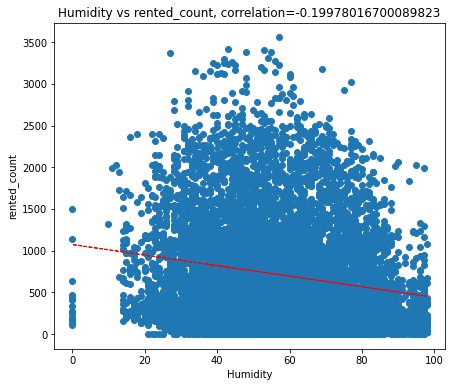

In [43]:
# Scatter plot between Humidity and rented count 
fig = plt.figure(figsize=(7,6))
ax=fig.gca()
correlation = df['humidity'].corr(df['rented_count'])
plt.scatter(x=df['humidity'],y=df['rented_count'])
z=np.polyfit(df['humidity'],df['rented_count'],1)
y_hat=np.poly1d(z)(df['humidity'])
plt.plot(df['humidity'],y_hat,'r--',lw=1)
plt.xlabel('Humidity')
plt.ylabel('rented_count')
plt.title('Humidity vs rented_count, correlation='+str(correlation))
plt.show()

#####. What is/are the insight(s) found from the chart?

rented_count is slightly negatively correlated with humidity.

#### Chart - 12 - Wind speed vs rented count scatter plot

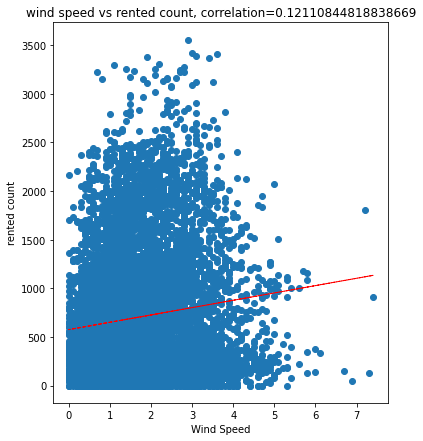

In [44]:
# Plotting scatter plot between wind speed and rented_count
fig = plt.figure(figsize=(6,7))
ax=fig.gca()
correlation = df['wind_speed'].corr(df['rented_count'])
plt.scatter(x=df['wind_speed'],y=df['rented_count'])
z=np.polyfit(df['wind_speed'],df['rented_count'],1)
y_hat=np.poly1d(z)(df['wind_speed'])
plt.plot(df['wind_speed'],y_hat,'r--',lw=1)
plt.xlabel('Wind Speed')
plt.ylabel('rented count')
plt.title('wind speed vs rented count, correlation='+str(correlation))
plt.show()

#####. What is/are the insight(s) found from the chart?

rented_count shows a slightly positive trend with wind speed.

#### Chart - 13 - Visibility vs rented count scatter plot

Text(0.5, 1.0, 'visibility vs rented_count, correlation=0.19928029673135897')

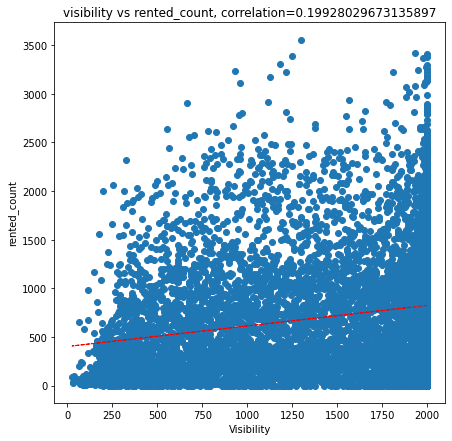

In [45]:
# plotting visibility and rented_count on 2D plane
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
correlation = df['visibility'].corr(df['rented_count'])
plt.scatter(x=df['visibility'],y=df['rented_count'])
z = np.polyfit(df['visibility'],df['rented_count'],1)
y_hat = np.poly1d(z)(df['visibility'])
plt.plot(df['visibility'],y_hat,'r--',lw=1)
plt.xlabel('Visibility')
plt.ylabel('rented_count')
plt.title('visibility vs rented_count, correlation='+str(correlation))


#####. What is/are the insight(s) found from the chart?

Though the correlation of rented_count with visibility is positive, it does not matter much.

#### Chart - 14 - Dew Point Temperature vs rented count scatter plot

Text(0.5, 1.0, 'Dew Point Temperature vs rented count, correlation=0.37978812124497235')

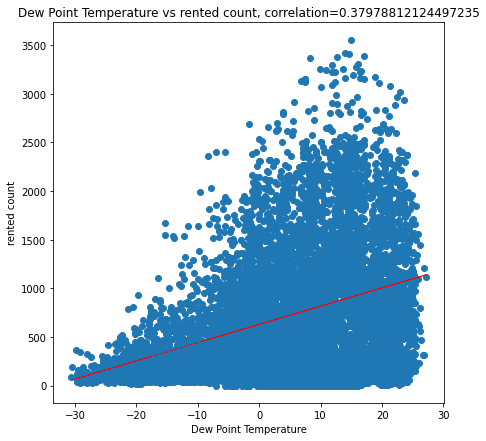

In [46]:
# Scatter plot between  dew point temperature and rented_count
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
correlation = df['dew_point_temp'].corr(df['rented_count'])
plt.scatter(x=df['dew_point_temp'],y=df['rented_count'])
z=np.polyfit(df['dew_point_temp'],df['rented_count'],1)
y_hat=np.poly1d(z)(df['dew_point_temp'])
plt.plot(df['dew_point_temp'],y_hat,'r--',lw=1)
plt.xlabel('Dew Point Temperature')
plt.ylabel('rented count')
plt.title('Dew Point Temperature vs rented count, correlation='+str(correlation))

#####. What is/are the insight(s) found from the chart?

The rented count shows increasing trend  with Dew Point Temperature but the correlation is not that strong. The higher Dew Point Temperature values have higher rented count but every Dew Point Temperature have some small rented count so, roughly, higher Dew Point Temperature value does not imply higher rented count.

#### Chart - 15 - Solar Radiation vs rented count scatter plot

Text(0.5, 1.0, 'Solar radiation vs rented count, correlation=0.261836985509591')

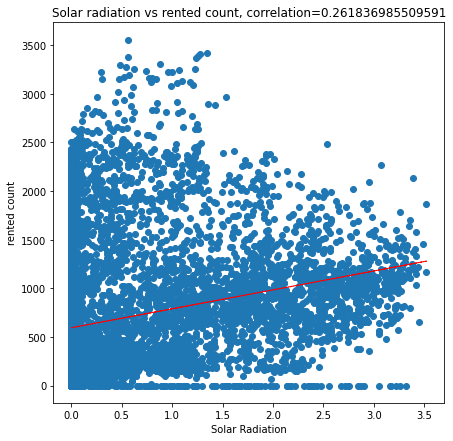

In [47]:
 # Scatter plot between solar radiation and rented_count
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
correlation = df['solar_radiation'].corr(df['rented_count'])
plt.scatter(x=df['solar_radiation'],y=df['rented_count'])
z=np.polyfit(df['solar_radiation'],df['rented_count'],1)
y_hat=np.poly1d(z)(df['solar_radiation'])
plt.plot(df['solar_radiation'],y_hat,'r--',lw=1)
plt.xlabel('Solar Radiation')
plt.ylabel('rented count')
plt.title('Solar radiation vs rented count, correlation='+str(correlation))

#####. What is/are the insight(s) found from the chart?

The scatter plot shows a weak positive correlation between rented_count and solar radiation.

#### Chart - 16 - Rainfall vs rented count scatter plot

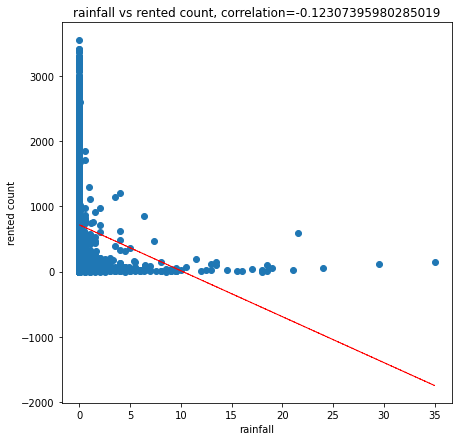

In [48]:
# Rainfall vs rented count scatter plot
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
correlation = df['rainfall'].corr(df['rented_count'])
plt.scatter(x=df['rainfall'],y=df['rented_count'])
z=np.polyfit(df['rainfall'],df['rented_count'],1)
y_hat=np.poly1d(z)(df['rainfall'])
plt.plot(df['rainfall'],y_hat,'r--',lw=1)
plt.xlabel('rainfall')
plt.ylabel('rented count')
plt.title('rainfall vs rented count, correlation='+str(correlation))
plt.show()

#####. What is/are the insight(s) found from the chart?

The correlation between rented_count and rainfall is negative which is obvious.

#### Chart - 17 - Snowfall vs rented count scatter plot

Text(0.5, 1.0, 'snowfall vs rented count, correlation=-0.1418036499974599')

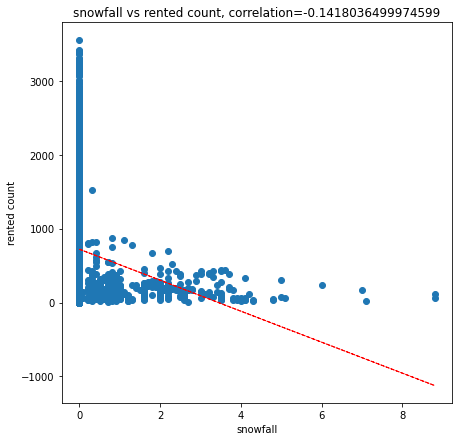

In [49]:
# Snowfall vs rented count scatter plot
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
correlation = df['snowfall'].corr(df['rented_count'])
plt.scatter(x=df['snowfall'],y=df['rented_count'])
z=np.polyfit(df['snowfall'],df['rented_count'],1)
y_hat=np.poly1d(z)(df['snowfall'])
plt.plot(df['snowfall'],y_hat,'r--',lw=1)
plt.xlabel('snowfall')
plt.ylabel('rented count')
plt.title('snowfall vs rented count, correlation='+str(correlation))

#####. What is/are the insight(s) found from the chart?

As expected, the correlation between rented_count and snowfall is negative but the correlation is very weak.

## ***5. Feature Engineering Data Pre-processing***

### Multicollinearity

In multiple regression model, multicollinearity means the existence of linear relationship among some or all independent variables. In case of perfect multicollinearity, the regression coefficients remain indeterminate and their standard errors are infinite.

In case of partial multicollinearity, the OLS estimates have large variances and covariances making precise estimation difficult. Due to large standard errors, the confidence intervals tend to be much wider leading to the acceptence of the 'zero null hypothesis' more readily i.e., the regression coefficient may not appear significant.

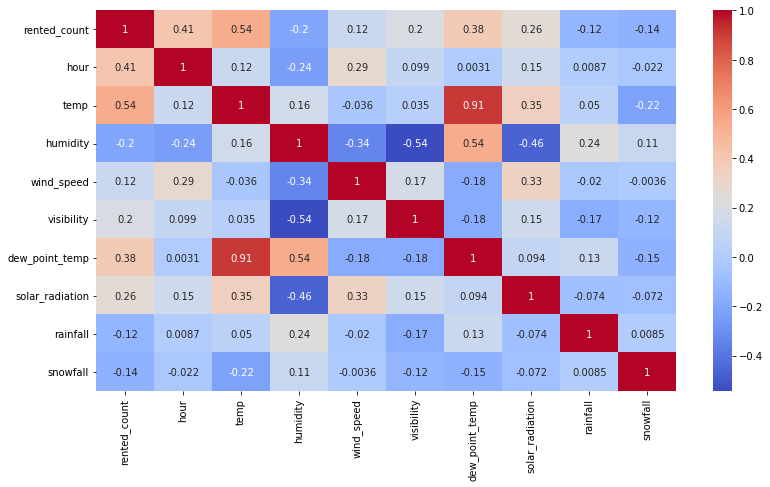

In [51]:
# plotting the heatmap to see the correlations
plt.figure(figsize=(13,7))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

The correlation heatmap suggests that the independent variables temp & dew_point_temp and visibility & humidity have considerable correlation.


Here, the correlation of dependent variable rented_count with  temperature is 0.54 and with hour it is 0.41.

**Variance Inflation Factor:**

VIF is a measure of amount of multicollinearity in regression model. VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.



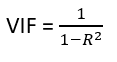

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

Large value of VIF indicates possible multicollinearity associated with the variable.


Generally, if VIF >= 10, multicollinearity is severe.

In [52]:
# writing a funtion to calculate VIF

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [53]:
# now create the vif dataframe holding the dependent variable rented_count.

calc_vif(df[[i for i in df.describe().columns if i not in['rented_count']]])

,variables,VIF
0,hour,4.418242
1,temp,33.385256
2,humidity,5.371996
3,wind_speed,4.805364
4,visibility,9.085977
5,dew_point_temp,17.126199
6,solar_radiation,2.881590
7,rainfall,1.081567
8,snowfall,1.120833


In [54]:
# removing the column dew_point_temp which has high vif value and low correlation with rented_count 
vif=calc_vif(df[[i for i in df.describe().columns if i not in['rented_count','dew_point_temp']]])
vif

,variables,VIF
0,hour,3.921832
1,temp,3.228318
2,humidity,4.868221
3,wind_speed,4.608625
4,visibility,4.710170
5,solar_radiation,2.246791
6,rainfall,1.079158
7,snowfall,1.120579


The VIF for temperature and dew point temperature were high so we removed the variable dew point temperature first as it had less correlation with the dependent variable rented_count.

Now all the vif values are less than 5 so the remaining 8 independent variables are not collinear.

In [ ]:
# The selected numerical features are:
numerical_columns=list(vif['variables'].unique())
print(numerical_columns)

['hour', 'temp', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']
